## Informe análisis de gastos CAFI año 2022



### Introducción



<p style="text-align: justify;">En este informe, se mostrará el analisis de los gastos mensuales que se han generado en el año 2022 mediante el componente de SAGEN/CAFI.</p>

<p style="text-align: justify;">Se documenta el informe, como se ha escrito, se aplicarán tecnicas concernientes a la tendencia central (estadistica), para saber datos o rangos relevantes en los datos que se analizarán, los cuales sirven para una toma de decisiones desde el ambito estratégico.</p>

<p style="text-align: justify;">El algoritmo, fue desarrollado en el lenguaje de programación Python, basado en el libro de (Roldán, 2022)</p>

*Nota: Para acceder a la página oficial del lenguaje de programación es: https://www.python.org/*

### 1 - Fase de analisis

<p style="text-align: justify;">En este informe, se mostrará el analisis de los gastos mensuales que se han generado en el año 2022 mediante el componente de SAGEN/CAFI.</p>

#### 1.1 - Importe de librerías o APIs necesarias para procesar o analizar la información

In [1]:
#Se procede con importar las librerías necesarias para procesar los datos:
import numpy as np # procesamiento matemático de numeros
import pandas as pd # a base de numpy para procesar numeros, letras y caracteres especiales
import matplotlib.pyplot as plt # para crear imagenes
import seaborn as sns # para crear y personalizar imagenes y objetos
import scipy.stats as ss # para calculos estadisticos (estadistica descriptiva)
import plotly.express as px #Librería para hacer gráficos interactivos

#### 1.2 - Leer la información de la fuente de datos

In [2]:
#Se toma el modulo "df" (DataFrame) de la librería de pandas, para leer el archivo Excel

df = pd.read_excel("C:/Users/wagne/Downloads/ANALISIS-CAFI-2022/data/GASTOSXTC.xlsx")#función de la librería pandas para poder leer los datos preprocesadsos
print(df)# orden a la maquina para que imprima el DataFrame


       GASTO X MES    MONTO
0        MES ENERO   886857
1      MES FEBRERO  1963280
2        MES MARZO   591890
3        MES ABRIL   997600
4         MES MAYO   937420
5        MES JUNIO  1072995
6        MES JULIO  2139441
7       MES AGOSTO  1420911
8   MES SEPTIEMBRE  1728680
9      MES OCTUBRE  2928550
10   MES NOVIEMBRE  1520022
11   MES DICIEMBRE  2078970


#### 1.3 - Conversión y codificación de los datos anteriormente leídos

In [3]:
#Conversión del archivo Excel a .csv delimitado por comas, con codificación internacional
df.to_csv('reports/gastos.csv', encoding="utf-8")#conversión y codificación del df

<p style="text-align: justify;">Se procede con que se lea el archivo delimitado por comas:</p>

In [4]:
df = pd.read_csv("reports/gastos.csv")#lectura del del archivo convertido
print(df)#impresión del nuevo df

    Unnamed: 0     GASTO X MES    MONTO
0            0       MES ENERO   886857
1            1     MES FEBRERO  1963280
2            2       MES MARZO   591890
3            3       MES ABRIL   997600
4            4        MES MAYO   937420
5            5       MES JUNIO  1072995
6            6       MES JULIO  2139441
7            7      MES AGOSTO  1420911
8            8  MES SEPTIEMBRE  1728680
9            9     MES OCTUBRE  2928550
10          10   MES NOVIEMBRE  1520022
11          11   MES DICIEMBRE  2078970


<p style="text-align: justify;">Limpieza de datos (Data Cleaning): hay una columna en la cual se redundan datos, se hará un metodo para borrarla.</p>

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True) #eliminar columna con el metodo "drop" de la librería de pandas

#### 1.4 - Crear tabla con colorido en sus datos según su valor

<p style="text-align: justify;">En este caso, se hará un método para que el DataFrame, muestre con colores fuertes los valores más altos; y los valores más bajos se vaya bajando la intensidad del color.</p>
<p style="text-align: justify;">Estas bondades son las que ofrece la librería Seaborn con su modulo sns.</p>

In [6]:
cm = sns.light_palette("red", as_cmap=True)#asignación de colores
print("pintando los valores del DataFrame")#impresión de un mensaje
print("GASTOS EJECUTADOS POR MES - 2022(DE MENOR A MAYOR)")#titulo para el DataFrame ya procesado
df.style.background_gradient(cmap=cm).set_precision(3)#Precisión de valores y estilo del df

pintando los valores del DataFrame
GASTOS EJECUTADOS POR MES - 2022(DE MENOR A MAYOR)


C:\Users\wagne\AppData\Local\Temp\ipykernel_12004\1305859247.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.style.background_gradient(cmap=cm).set_precision(3)#Precisión de valores y estilo del df


,GASTO X MES,MONTO
0,MES ENERO,886857
1,MES FEBRERO,1963280
2,MES MARZO,591890
3,MES ABRIL,997600
4,MES MAYO,937420
5,MES JUNIO,1072995
6,MES JULIO,2139441
7,MES AGOSTO,1420911
8,MES SEPTIEMBRE,1728680
9,MES OCTUBRE,2928550


#### 1.5 - Realización de gráficas a los datos para su análisis

<p style="text-align: justify;">Todo entra por los ojos a través de imágenes, por eso los datos anteriormente analizados y procesados, se tomarán para graficarlos en diferentes tipos de visualización, para la toma adecuada de decisiones. </p>

"*Una imagen vale más que mil palabras*"

##### 1.5.1 - Gráfica de barras horizontal

<p style="text-align: justify;">Una forma con Matplotlib</p>

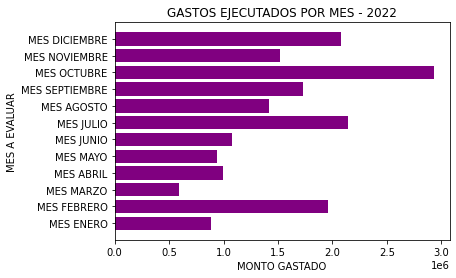

In [7]:
plt.barh(df['GASTO X MES'], df['MONTO'], color=['purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple']) # se ponen a graficar el dataframe tomando como referencia los 
plt.title('GASTOS EJECUTADOS POR MES - 2022')
plt.xlabel('MONTO GASTADO')
plt.ylabel('MES A EVALUAR')
plt.show()

<p style="text-align: justify;">Otra forma de varios colores con Seaborn</p>

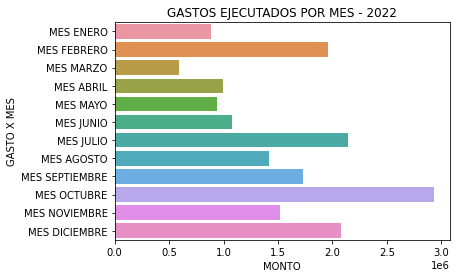

In [8]:
#Para sacarlos de varios colores
plt.title('GASTOS EJECUTADOS POR MES - 2022')
sns.barplot(x='MONTO',y='GASTO X MES',data=df);

<p style="text-align: justify;">Otra forma con la librería Plotly para que se vea interactiva</p>

In [33]:
fig = px.bar(df, x='MONTO', y='GASTO X MES', text='MONTO')#el metodo "text" es para añadir etiquetas al gráfico.

#para añadir leyenda al gráfico
fig.update_layout(
    xaxis_title="MONTO - UNIDADES MONETARIAS",
    yaxis_title="MES"
)

# Añadir un título al gráfico
fig.update_layout(
    title="GASTOS EJECUTADOS POR MES - 2022"
)

#para ejecutar la grafica programada
fig.show()

##### 1.5.2 - Gráfica de torta con sus respectivos porcentajes

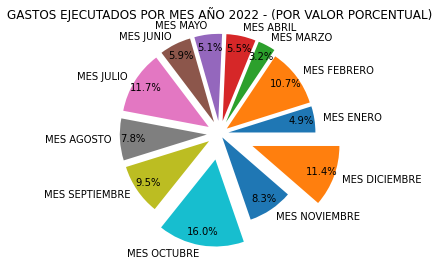

In [10]:
explode = (0.10, 0.10, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.30, 0.05, 0.40)

plt.pie(df['MONTO'],labels=df['GASTO X MES'], autopct="%0.1f%%", pctdistance=0.85,explode=explode)
plt.title("GASTOS EJECUTADOS POR MES AÑO 2022 - (POR VALOR PORCENTUAL)")
plt.show()

##### 1.5.3 - Gráfica tipo histograma

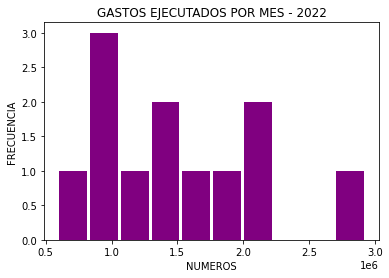

In [11]:
#https://appgametutoriales.com/hacer-un-histograma-en-python/
plt.hist(df['MONTO'],color = "purple",rwidth=0.9) # se ponen a graficar el dataframe tomando como referencia los 
plt.title('GASTOS EJECUTADOS POR MES - 2022')
plt.xlabel('NUMEROS')
plt.ylabel('FRECUENCIA')
plt.show()

##### 1.5.4 - Gráfica tipo histograma sin color de fondo

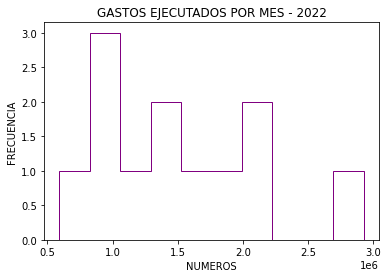

In [12]:
plt.hist(df['MONTO'],color = "purple",rwidth=0.9, histtype="step") # se ponen a graficar el dataframe tomando como referencia los 
plt.title('GASTOS EJECUTADOS POR MES - 2022')#Se ele asigna titulo a la grafica
plt.xlabel('NUMEROS')#etiqueta al eje X
plt.ylabel('FRECUENCIA')#etiqueta al eje Y
plt.show()#función para que plotee, dibuje o muestre los graficamente los datos a evaluar

##### 1.5.5 - Grafica de violín

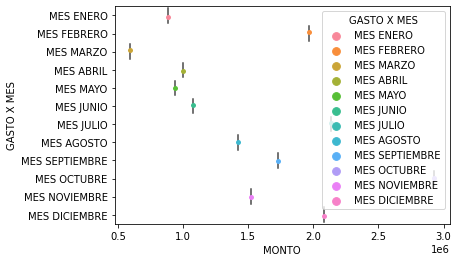

In [13]:
#Haciendo Gráfica de violín

ax = sns.violinplot(
    data=df,
    x='MONTO', 
    y="GASTO X MES",
    
)


ax = sns.stripplot(
    data=df,
    x='MONTO', 
    y="GASTO X MES",
    hue='GASTO X MES' # leyenda o convención
)

##### 1.5.6 - Gráfica tipo linea 

Se muestra el grafico


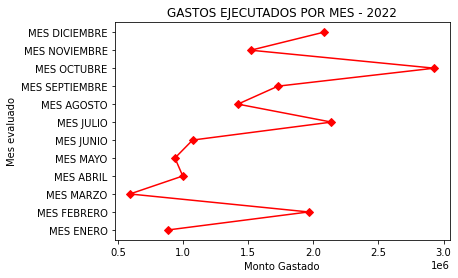

In [14]:
# gráfico de líneas utilizando matplotlib
print("Se muestra el grafico")
fig, ax = plt.subplots()
plt.xlabel("Monto Gastado")
plt.ylabel('Mes evaluado')
ax.plot(df['MONTO'],df['GASTO X MES'], marker = "D",color='r')#EL MARKER ES PARA PONER LOS PUNTICOS EN LA PARTE DONDE SE MARCAN LOS DATOS. -https://matplotlib.org/stable/api/markers_api.html
plt.title('GASTOS EJECUTADOS POR MES - 2022')
plt.show()


##### 1.5.7 - Gráfica de dispersión


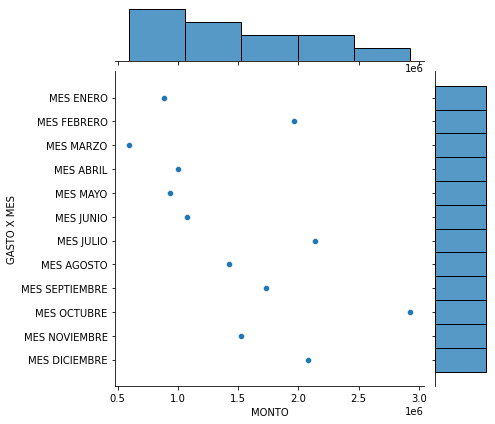

In [15]:
sns.jointplot(
    data=df, x='MONTO', y="GASTO X MES"
    
)

#### 1.6 - Aplicación técnicas estadisticas de tendencia central

<p style="text-align: justify;">Se hace con el fin de calcular probabilidades, e ir a un análisis más detallados en los datos procesados.</p>

##### 1.6.1 - Calculo de la media o promedio

In [16]:
#calculo de la media o promedio - https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii
#La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos.
media=df["MONTO"].mean()

print("la media es:", media)

#esto quiere decir, si ponemos de una forma equitativa el gasto mensual, como maximo serían 1.522.218

la media es: 1522218.0


##### 1.6.2 - Calculo de la mediana

In [17]:
#calculo de la mediana -https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana=df["MONTO"].median()

print("La mediana es:", mediana)

La mediana es: 1470466.5


##### 1.6.3 - Calculo de la moda

In [18]:
#Calculo de la moda - 
#La moda es el valor más repetido (solo aplicable a variables discretas).
moda=df["MONTO"].mode()
print("La moda es:", moda)

La moda es: 0      591890
1      886857
2      937420
3      997600
4     1072995
5     1420911
6     1520022
7     1728680
8     1963280
9     2078970
10    2139441
11    2928550
Name: MONTO, dtype: int64


##### 1.6.4 - Calculo de Medidas de posición: cuartiles y percentiles

In [19]:
p90 = df["MONTO"].quantile(0.9)
print("El cuartil y percentil es: ", p90)

#El concepto es igual al de mediana, salvo que aquí la división ya no es en el 50%. 
#El 25% de las observaciones es menor que el primer cuartil. 
#Los cuartiles abarcan el 25%, 50% y 75% de las observaciones. Los percentiles son una generalización con cualquier porcentaje.

El cuartil y percentil es:  2133393.9


##### 1.6.5 - Medidas de asimetría

In [20]:
asimetria = ss.skew(df["MONTO"])#se calcula con el metodo skew
print("La asimetría es: ", asimetria)

#Para saber si los datos estan repartidos de forma simétrica existen varios coeficientes: Pearson, Fisher, Bowley-Yule, etc

#Para no liarnos demasiado, podemos usar la función skew de SciPy.

#Para valores cercanos a 0, la variable es simétrica. Si es positiva tiene cola a la derecha y si es negativa tiene cola a la izquierda.

#Y con esto hemos visto los datos que se pueden extraer de una sola variable.

La asimetría es:  0.5526368964490085


##### 1.6.5.1 - Representando gráficamente la asimetría con los datos

c:\Users\wagne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



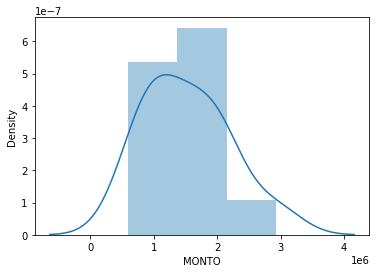

In [21]:
#Representación gráfica de la asimetría
sns.distplot(df['MONTO']);

##### 1.6.5.2 - Curva de la asimetría

<AxesSubplot:xlabel='MONTO', ylabel='Density'>

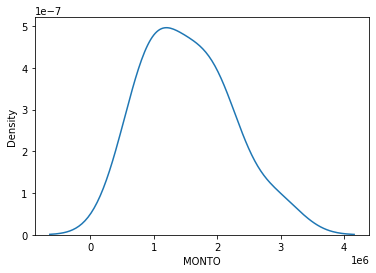

In [22]:
#La forma de la asimetría
sns.kdeplot(df['MONTO'])

<p style="text-align: justify;">Conclusión: ¡La asimetría tiene una tendencia a ser negativa!, Pero aún tiene valor positivo, ya que está cercano al cero (0)</p>


##### 1.6.6 - Coeficiente de correlación

In [23]:
# Calculo del coeficiente de correlación que es es la medida específica que cuantifica la intensidad de la relación lineal entre dos variables en un análisis de correlación. En los informes de correlación, este coeficiente se simboliza con la r.
df.corr()
# por ende se da a entender que que el coeficiente es positivo, porque valores de ambas variables tienden a incrementarse juntos.



,MONTO
MONTO,1.0


<p style="text-align: justify;">Graficando el coeficiente con Seaborn</p>

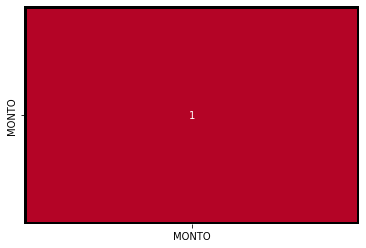

In [24]:
#Graficando el coeficiente
sns.heatmap(df.corr(), annot= True, cmap='coolwarm', linewidths=5, linecolor='black', vmin=0.5,vmax=1,cbar=False);

##### 1.6.7 - Calculo de la covarianza

In [25]:
# Calculo de la covarianza que es La covarianza nos mide la covariación conjunta de dos variables: Si es positiva nos dará la información de que a valores altos de una de las variable hay una mayor tendencia a encontrar valores altos de la otra variable y a valores bajos de una de las variable ,correspondientemente valores bajos.
df.cov()
#se influye que es positiva porque incrementa, ya que hay numeros positivos

,MONTO
MONTO,4.549404e+11


##### 1.6.8 - Calculo de la Varianza

In [26]:
# Calculo de la varianza que es la forma de como entender los datos en su dispersión y variabilidad, es decir si los valores están alejados y desviados o no de la media, por que si está alejado de esta.
df['MONTO'].var()

454940429979.2727


<p style="text-align: justify;">Se nota una mayor varianza, lo que se concluye que hay más dispersión o más alejamiento del valor reflejado en el valor de la media, que en el caso de estudio fue  1522218.0 </p>

##### 1.6.9 - Resumen estadístico

In [27]:
# Realización de un resumen estadístico del DataFrame
df['MONTO'].describe()

count    1.200000e+01
mean     1.522218e+06
std      6.744927e+05
min      5.918900e+05
25%      9.825550e+05
50%      1.470466e+06
75%      1.992202e+06
max      2.928550e+06
Name: MONTO, dtype: float64

##### 1.6.10 - Calculo de la derivación estandar

In [28]:
#Calculo de la derivación estandar, que es una media de dispersion de datos que cuanto mayor sea la dispersión de los datos, mayor es la desviación estandar.
df.std()

C:\Users\wagne\AppData\Local\Temp\ipykernel_12004\2795832978.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



MONTO    674492.720479
dtype: float64

##### 1.6.11 - Descripción del DataFrame

In [29]:
#Consultar la información y /o descripción del DataFrame
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GASTO X MES  12 non-null     object
 1   MONTO        12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


##### 1.6.12 - Conteo de los indices del DataFrame

In [30]:
# Conteo de Indices o filas con datos en el DataFrame
df.count()

GASTO X MES    12
MONTO          12
dtype: int64

### 2 - Conclusiones del analisis

 <p style="text-align: justify;">-Mucho gasto en el mes de octubre, por plan vacacional y traida del carro a Florencia - Caquetá, ya que hubieron gastos extra por peajes, los cuales no se tenían previstos.</p>
 <p style="text-align: justify;">-Se compara diciembre con mitad de año y se observa un menor gasto a fin de año, por termino del proyecto academico (Carrera profesional).</p>
 <p style="text-align: justify;">-En el mes de febrero, se ve reflejado la ida de cindy para Cucuta - Norte de Santander a visitar su padre (Q.E.P.D).</p>
 <p style="text-align: justify;">-En el mes de marzo, fue donde menos se gastó, ya que hubo apoyo economico por parte de cindy.</p>
 <p style="text-align: justify;">-Hay una asimetría con tendencia negativa, desviandose del eje de la asimetría.</p>

<p style="text-align: justify;">Conforme a lo anterior, se tomarán las siguientes decisiones:</p>

<p style="text-align: justify;">*Ahorrar para salir a vacaciones para cubrir esos gastos adicionales.</p>

<p style="text-align: justify;">*Hacer cotizaciones y hacerlo con buen tiempo.</p>

<p style="text-align: justify;">*Proyección de un plan de ahorro de emergencia.</p>

### 3 - Referencias Bibliográficas


Estadística en Python: media, mediana, varianza, percentiles (Parte III). (2017, 4 noviembre). Adrianistán. https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii

Admin, A. (2021, 20 julio). Hacer un histograma en Python. App Game Tutoriales. Recuperado 12 de diciembre de 2022, de https://appgametutoriales.com/hacer-un-histograma-en-python/

Briega, L. R. E. (2016, 13 marzo). Análisis de datos cuantitativos con Python. https://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/

Bruce, A., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python. O’Reilly.

McKinney, W. (2013). Python for Data Analysis. Van Duuren Media.

Vanderplas, J., & VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. Van Duuren Media.

Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con Python: recolección, almacenamiento y proceso. Alfaomega.


